# Table of Content
[1. IMPORTING LIBRARIES](#sec-1)

[2. LOADING DATA](#sec-2)

<a id="sec-1"></a> <br>
# 1. IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# import thư viện matplotlib để chỉnh màu cho biểu đồ
import matplotlib.colors
pal = ['#009473', '#00537c', '#b4b4b4', '#da3e21']
cmap = matplotlib.colors.ListedColormap(pal)

In [3]:
# import thư viện scikit-learn để tính toán 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [4]:
 
!pip install yellowbrick

In [5]:
!pip install plotly

In [6]:
# import thư viện để phân cụm
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import time
import plotly.graph_objects as go

# xóa các cảnh báo
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

<a id="sec-2"></a> <br>
# 2. DATA LOADING

In [7]:
df = pd.read_csv("marketing_campaign.csv", sep='\t')


<a id="sec-3"></a>
# 3. DATA CLEANING
<a id="sub-3-1"></a>
## 3.1. Understand data

In [8]:
df.shape

(2240, 29)

In [9]:
df = df.rename(columns={
    'MntWines' : 'Wines',
                          'MntFruits' : 'Fruits',
                          'MntMeatProducts' : 'Meat',
                          'MntFishProducts' : 'Fish',
                          'MntSweetProducts' : 'Sweets',
                          'MntGoldProds' : 'Gold'
})
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [10]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
# Tạo ds tên cột dựa trên kiểu dữ liệu
numeric_columns = ['Income', 'Kidhome',
       'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

bool_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']

category_columns = ['Education', 'Marital_Status']

date_columns = ['Year_Birth', 'Dt_Customer']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   Wines                2240 non-null   int64  
 10  Fruits               2240 non-null   int64  
 11  Meat                 2240 non-null   int64  
 12  Fish                 2240 non-null   int64  
 13  Sweets               2240 non-null   int64  
 14  Gold                 2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Note:
* Có các giá trị bị thiếu trong cột **Income**
* **Dt_Customer** chưa đúng định dạng Date Time

<a id="sub-3-2"></a>
## 3.2. Check and Impute missing values

In [13]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
Wines                   0
Fruits                  0
Meat                    0
Fish                    0
Sweets                  0
Gold                    0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [14]:
# In ra các giá trị bị thiếu trong cột 'Income'
income_missing = df[df['Income'].isna()]
income_missing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [15]:
# Tính giá trị trung bình của thu nhập được nhóm theo trình độ học vấn
group_means = df.groupby('Education')['Income'].mean()

# Điền các giá trị còn thiếu trong cột "Income"
df['Income'] = df['Income'].fillna(df['Education'].map(group_means))

In [16]:
# Kiểm tra lại các giá trị còn thiếu trong dataset
print('Missing data: ', df.isna().sum().sum())

Missing data:  0


<a id="sub-3-3"></a>
## 3.3. Cleaning data

* Tạo thuộc tính mới "**Days_since_enrolment**" để biết số ngày kể từ khi khách hàng bắt đầu mua sắm.
* Tạo thuộc tính mới "**Age**" để xác định độ tuổi khách hàng
* Tạo thuộc tính mới "**Spent**" để biết tổng số tiền mà khách hàng đã chi tiêu cho nhiều danh mục khác nhau trong 2 năm.
* Nhóm "**Marital Status**"về 2 trạng thái: "Alone" and "Partner".
* Tạo thuộc tính mới  "**Children**" để chỉ tổng số con trong hộ gia đình.
* Tạo thuộc tính mới "**Family_Size**" chỉ tổng số thành viên trong gia đình.
* Tạo thuộc tính mới "**Is_Parent**"  để biết khách hàng có là cha mẹ hay không.
* Đơn giản hóa thuộc tính"**Education**"
* Xóa các thuộc tính không cần thiết (Dt_Customer, Z_CostContact, Z_Revenue, Year_Birth, ID).


In [17]:
# Chuyển đổi cột 'Dt_Customer' thành định dạng ngày giờ
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Tìm giá trị Max và Min của cột 'Dt_Customer'
max_date = df['Dt_Customer'].max() 
min_date = df['Dt_Customer'].min()
print("Ngày đăng ký của khách hàng mới nhất trong hồ sơ:", max_date)
print("Ngày đăng ký của khách hàng lâu đời nhất trong hồ sơ:", min_date)

# Tính số ngày kể từ lúc khách hàng bắt đầu mua hàng
df['Days_since_enrolment'] = df['Dt_Customer'].apply(lambda x: (max_date - x).days) 

# Tính số tuổi của khách hàng
df['Age'] = 2024 - df['Year_Birth']

Ngày đăng ký của khách hàng mới nhất trong hồ sơ: 2014-06-29 00:00:00
Ngày đăng ký của khách hàng lâu đời nhất trong hồ sơ: 2012-07-30 00:00:00


In [18]:
# Đếm giá trị của các cột phân loại
print('Values of Education levels: ', df['Education'].value_counts())
print('Values of Marital Status: ', df['Marital_Status'].value_counts())

Values of Education levels:  Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Values of Marital Status:  Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [19]:
# Nhóm tình trạng hôn nhân về 2 trạng thái là partner và Alone
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: "Partner" if x in {"Married", "Together"} else "Alone")


# Chia trình độ học vấn thành 3 nhóm Graduate, Postgraduate, Undergrade
df['Education'] = df['Education'].replace({'Basic' : 'Undergrade', 
                                           '2n Cycle' : 'Undergrade', 
                                           'Graduation' : 'Graduate', 
                                           'Master' : 'Postgraduate',
                                           'PhD' : 'Postgraduate'})

                                           
print('Values of Education levels: ', df['Education'].value_counts())
print('Values of Marital Status: ', df['Marital_Status'].value_counts())

Values of Education levels:  Education
Graduate        1127
Postgraduate     856
Undergrade       257
Name: count, dtype: int64
Values of Marital Status:  Marital_Status
Partner    1444
Alone       796
Name: count, dtype: int64


In [20]:
# Tính tổng số con trong gia đình
df['Children'] = df['Kidhome'] + df['Teenhome']

# Tính tổng số thành viên tỏng gia đình
df['Family_Size'] = df['Marital_Status'].replace({"Alone" : 1, "Partner" : 2}) + df['Children']

# Tạo cột mới "Is_Parent" để đánh dấu là cha mẹ với đk số con > 0
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)

In [21]:
# Tính tổng chi tiêu cho tất cả các loại sản phẩm
df['Spent'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']

In [22]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Complain,Z_CostContact,Z_Revenue,Response,Days_since_enrolment,Age,Children,Family_Size,Is_Parent,Spent
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,663,67,0,1,0,1617
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,113,70,2,3,1,27
2,4141,1965,Graduate,Partner,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,312,59,0,2,0,776
3,6182,1984,Graduate,Partner,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,139,40,1,3,1,53
4,5324,1981,Postgraduate,Partner,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,161,43,1,3,1,422
5,7446,1967,Postgraduate,Partner,62513.0,0,1,2013-09-09,16,520,...,0,3,11,0,293,57,1,3,1,716
6,965,1971,Graduate,Alone,55635.0,0,1,2012-11-13,34,235,...,0,3,11,0,593,53,1,2,1,590
7,6177,1985,Postgraduate,Partner,33454.0,1,0,2013-05-08,32,76,...,0,3,11,0,417,39,1,3,1,169
8,4855,1974,Postgraduate,Partner,30351.0,1,0,2013-06-06,19,14,...,0,3,11,1,388,50,1,3,1,46
9,5899,1950,Postgraduate,Partner,5648.0,1,1,2014-03-13,68,28,...,0,3,11,0,108,74,2,4,1,49


In [23]:
# Lưu thành file csv
df.to_csv('Marketing_end.csv', sep='\t', encoding='utf-8')

In [24]:
# Xóa 1 số thuộc tính dư thừa
to_drop = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
df = df.drop(to_drop, axis = 1)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2240 non-null   object 
 1   Marital_Status        2240 non-null   object 
 2   Income                2240 non-null   float64
 3   Kidhome               2240 non-null   int64  
 4   Teenhome              2240 non-null   int64  
 5   Recency               2240 non-null   int64  
 6   Wines                 2240 non-null   int64  
 7   Fruits                2240 non-null   int64  
 8   Meat                  2240 non-null   int64  
 9   Fish                  2240 non-null   int64  
 10  Sweets                2240 non-null   int64  
 11  Gold                  2240 non-null   int64  
 12  NumDealsPurchases     2240 non-null   int64  
 13  NumWebPurchases       2240 non-null   int64  
 14  NumCatalogPurchases   2240 non-null   int64  
 15  NumStorePurchases    

None

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2240.0,52253.592375,25039.085601,1730.0,35538.75,51609.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
Wines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
Fruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
Meat,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
Fish,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
Sweets,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
Gold,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0


 Trong cột thu nhập có  sự chênh lệch lớn giữa 75% và 100%

 Trong cột , giá trị cao nhất là 129, điều này không bình thường.

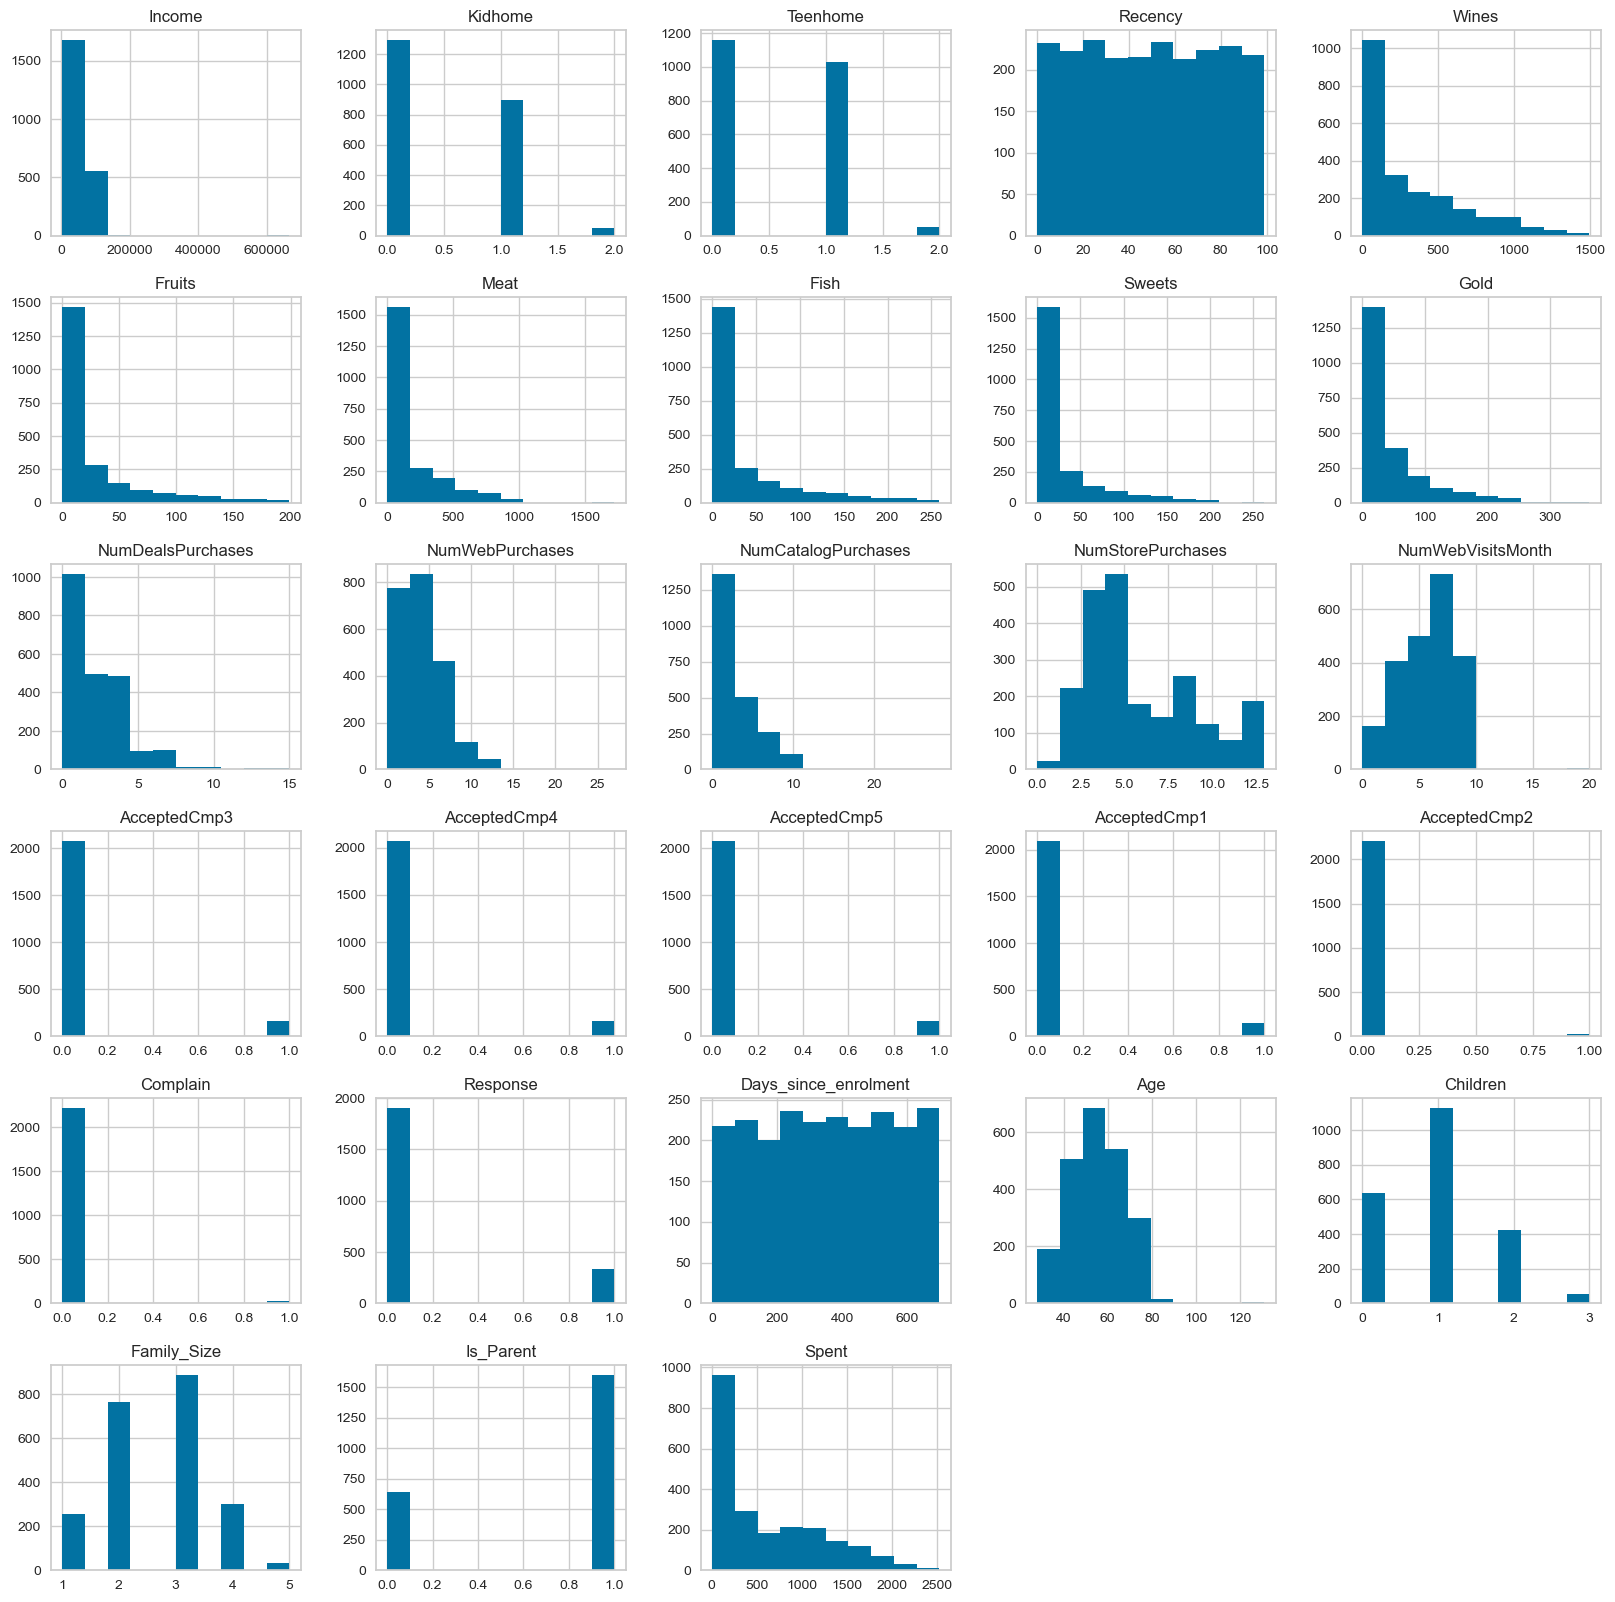

In [26]:
# Vẽ biểu đồ Hist để thể hiện phân bố của các biến số
df.hist(figsize=(20,20))
plt.show()

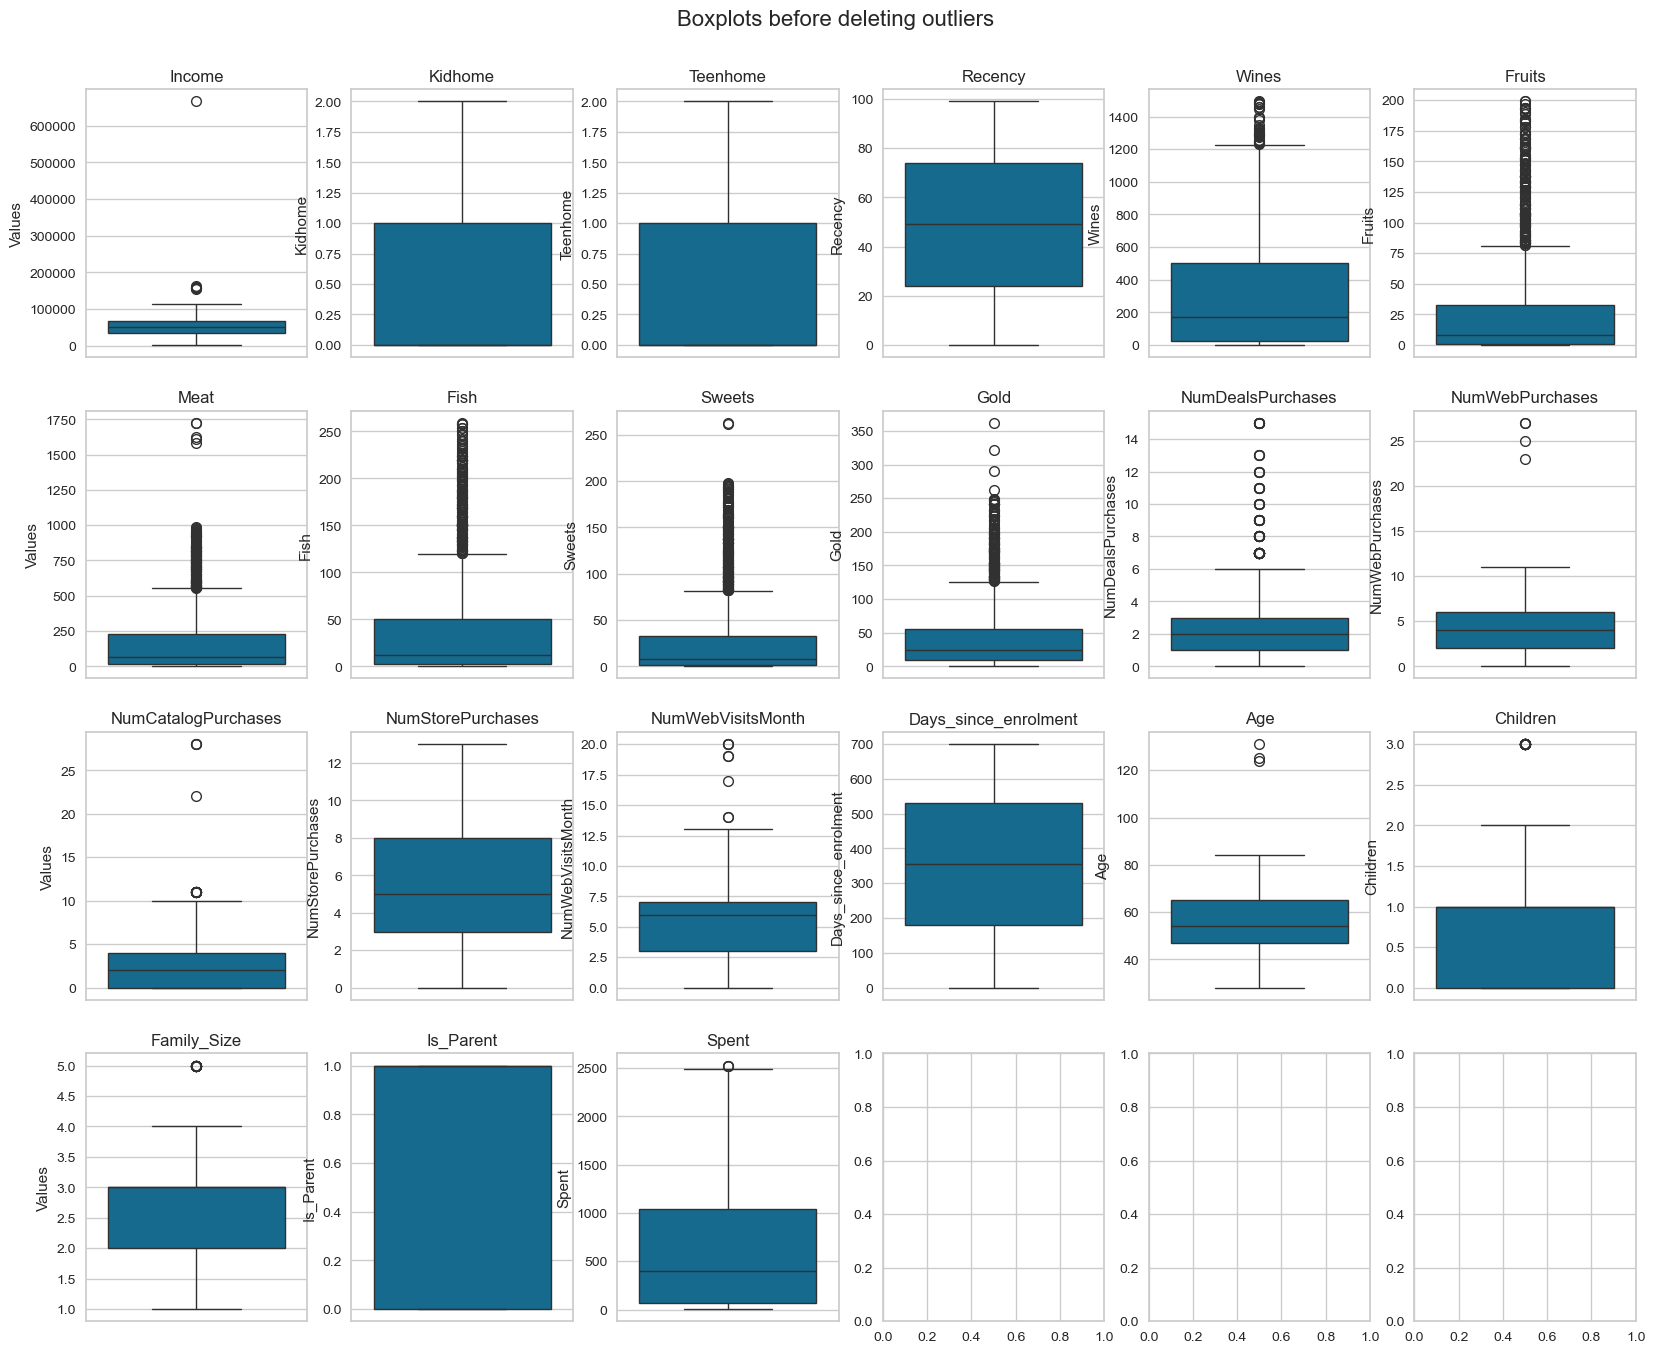

In [27]:
# Lấy các thuộc tính kiểu số
numeric_columns = ['Income', 'Kidhome',
       'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
       'Days_since_enrolment', 'Age', 'Children',
       'Family_Size', 'Is_Parent', 'Spent']

# Vẽ biểu đồ boxplot để phát hiển các giá trị bất thường
def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,16)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=4, cols=6, suptitle='Boxplots before deleting outliers')

#### Note: 
Từ biểu đồ trên, chúng ta có thể thấy *tuổi > 90* và *thu nhập > 600000* là bất thường, do đó chúng ta cần loại bỏ chúng.

In [28]:
#Drop outliers by setting a cap in the 'Income' and 'Age' columns
df= df[(df['Age'] < 90)]
df = df[(df['Income'] < 600000)]
print('Tổng số điểm dữ liệu sau khi loại bỏ các giá trị ngoại lệ:', len(df))

Tổng số điểm dữ liệu sau khi loại bỏ các giá trị ngoại lệ: 2236


<a id="sub-3-5"></a>
## 3.5. Correlation

In [29]:
df.describe(include=[float, int]).T


,count,mean,std,min,25%,50%,75%,max
Income,2236.0,51968.258909,21412.998830,1730.0,35502.50,51566.0,68275.75,162397.0
Kidhome,2236.0,0.444097,0.538459,0.0,0.00,0.0,1.00,2.0
Teenhome,2236.0,0.506708,0.544609,0.0,0.00,0.0,1.00,2.0
Recency,2236.0,49.116279,28.957284,0.0,24.00,49.0,74.00,99.0
Wines,2236.0,304.127460,336.591810,0.0,24.00,174.0,504.25,1493.0
Fruits,2236.0,26.275939,39.724007,0.0,1.00,8.0,33.00,199.0
Meat,2236.0,166.983453,225.689645,0.0,16.00,67.0,232.00,1725.0
Fish,2236.0,37.536225,54.648562,0.0,3.00,12.0,50.00,259.0
Sweets,2236.0,27.080501,41.299504,0.0,1.00,8.0,33.00,263.0
Gold,2236.0,43.983005,52.061568,0.0,9.00,24.0,56.00,362.0


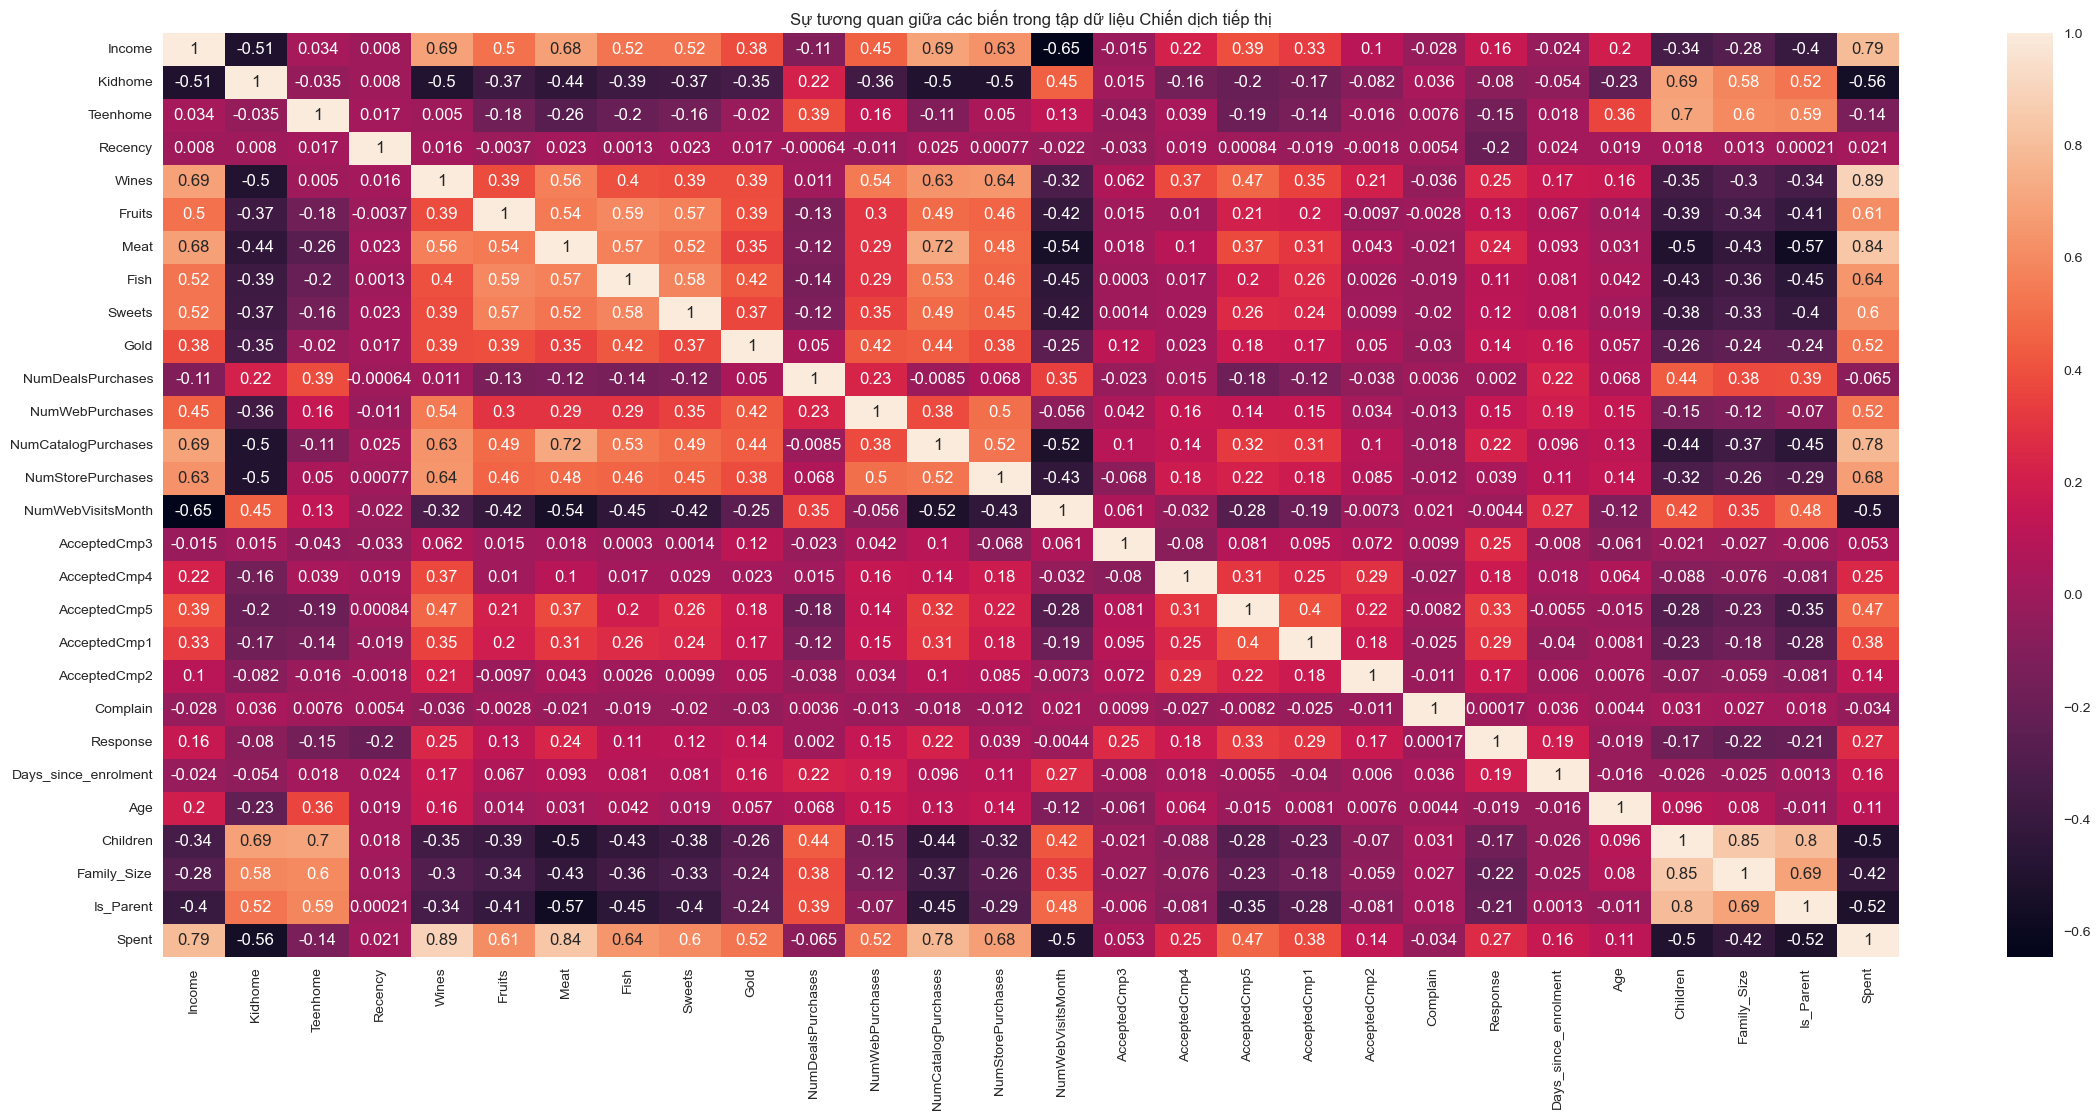

In [30]:
# Tìm mối tương quan giữa các biến. sử dụng heatmap

df_numeric = df.select_dtypes(include=['number'])

# Vẽ heatmap
plt.figure(figsize=(28, 12))
sns.heatmap(df_numeric.corr(), 
            annot=True)
plt.title('Sự tương quan giữa các biến trong tập dữ liệu Chiến dịch tiếp thị')
plt.show()

# plt.figure(figsize=(28, 12))
# sns.heatmap(df.corr(),
#             annot = True)
# plt.title('Correlation between variables in the Marketing Campaign dataset')
# plt.show()

In [31]:
print(df.dtypes)

Education                object
Marital_Status           object
Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
Wines                     int64
Fruits                    int64
Meat                      int64
Fish                      int64
Sweets                    int64
Gold                      int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Response                  int64
Days_since_enrolment      int64
Age                       int64
Children                  int64
Family_Size               int64
Is_Parent                 int32
Spent                     int64
dtype: object




<a id="sec-4"></a>
# 4. DATA PRE-PROCESSING

<a id="sub-4-1"></a>

## 4.1. Label enconding the categorical columns

In [32]:
# Tạo đối tượng LabelEncoder
le = LabelEncoder()

# Sao chép tập dữ liệu gốc gán vào biến ds
ds = df.copy()
# Chọn các cột phân loại
categorical_cols = ds.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    ds[col] = le.fit_transform(ds[col]) # Mã hóa giá trị trong cột thành giá trị số
    
# Hiển thị thông tin về DataFrame
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2236 non-null   int32  
 1   Marital_Status        2236 non-null   int32  
 2   Income                2236 non-null   float64
 3   Kidhome               2236 non-null   int64  
 4   Teenhome              2236 non-null   int64  
 5   Recency               2236 non-null   int64  
 6   Wines                 2236 non-null   int64  
 7   Fruits                2236 non-null   int64  
 8   Meat                  2236 non-null   int64  
 9   Fish                  2236 non-null   int64  
 10  Sweets                2236 non-null   int64  
 11  Gold                  2236 non-null   int64  
 12  NumDealsPurchases     2236 non-null   int64  
 13  NumWebPurchases       2236 non-null   int64  
 14  NumCatalogPurchases   2236 non-null   int64  
 15  NumStorePurchases     2236

In [33]:
ds.head(10)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_since_enrolment,Age,Children,Family_Size,Is_Parent,Spent
0,0,0,58138.0,0,0,58,635,88,546,172,...,0,0,0,1,663,67,0,1,0,1617
1,0,0,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,113,70,2,3,1,27
2,0,1,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,312,59,0,2,0,776
3,0,1,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,139,40,1,3,1,53
4,1,1,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,161,43,1,3,1,422
5,1,1,62513.0,0,1,16,520,42,98,0,...,0,0,0,0,293,57,1,3,1,716
6,0,0,55635.0,0,1,34,235,65,164,50,...,0,0,0,0,593,53,1,2,1,590
7,1,1,33454.0,1,0,32,76,10,56,3,...,0,0,0,0,417,39,1,3,1,169
8,1,1,30351.0,1,0,19,14,0,24,3,...,0,0,0,1,388,50,1,3,1,46
9,1,1,5648.0,1,1,68,28,0,6,1,...,0,0,0,0,108,74,2,4,1,49


<a id="sub-4-2"></a>
## 4.2. Scale data using Standard Scaler

In [34]:
# Loại bỏ các cột boolean và gán vào biến df_before_scale
df_before_scale = ds.drop(bool_columns, axis = 1) # dataframe mới với các biến số

# Tạo đối tượng StandardScaler
scaler = StandardScaler()

# Chuẩn hóa 
scaled_data = scaler.fit_transform(df_before_scale)


# Tạo dataframe mới với dữ liệu đã được chuẩn hóa
df_scaled = pd.DataFrame(scaled_data, columns=df_before_scale.columns)

df_scaled.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_since_enrolment,Age,Children,Family_Size,Is_Parent,Spent
0,-0.89438,-1.347635,0.288195,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,...,1.407639,2.509801,-0.552429,0.692865,1.529793,1.016868,-1.264308,-1.758810,-1.584362,1.680176
1,-0.89438,-1.347635,-0.262715,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,...,-1.110921,-0.568970,-1.167738,-0.131421,-1.191143,1.273264,1.395139,0.445618,0.631169,-0.962202
2,-0.89438,0.742041,0.917627,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,...,1.407639,-0.226884,1.293496,-0.543564,-0.206659,0.333146,-1.264308,-0.656596,-1.584362,0.282541
3,-0.89438,0.742041,-1.182829,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,...,-0.751127,-0.911056,-0.552429,0.280722,-1.062517,-1.290693,0.065416,0.445618,0.631169,-0.918994
4,0.57070,0.742041,0.295435,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,...,0.328256,0.115201,0.062879,-0.131421,-0.953679,-1.034298,0.065416,0.445618,0.631169,-0.305762


<a id="sec-5"></a>
# 5. DIMENSIONALITY REDUCTION BY PCA
Principal Component Analysis (PCA) là phương pháp được sử dụng để làm giảm số chiều của 1 tập dữ liệu, giúp tăng cường khả năng diễn giải (trực quan đồ thị) và giảm thiểu mất mát thông tin.

<a id="sub-5-1"></a>

<a id="sub-5-3"></a>
## 5.1. Perform PCA with the chosen number of components

In [35]:
# Tạo đối tượng PCA với 3 chiều
pca = PCA(n_components = 3)

# Khớp mô hình với dữ liệu đã chuẩn hóa với 3 chiều
pca.fit(df_scaled)

df_pca = pca.transform(df_scaled) # Biến đổi dữ liệu ban đầu thành các thành phần mới có số chiều là 3
df_pca = pd.DataFrame(df_pca, columns=['D1', 'D2', 'D3']) # Lưu vào DataFrame với 3 cột D1, D2, D3
df_pca

,D1,D2,D3
0,4.983479,-0.146443,2.429740
1,-2.862900,0.024341,-1.554388
2,2.622236,-0.734995,-0.259083
3,-2.641833,-1.456475,-0.348740
4,-0.646292,0.174616,-0.115591
...,...,...,...
2231,2.312048,2.434228,0.554176
2232,-3.098417,3.996635,-1.416016
2233,2.681520,-1.883266,0.501368
2234,1.489633,1.645560,-1.760852


<a id="sub-5-5"></a>
## 5.2. Plot PCA with 3 components

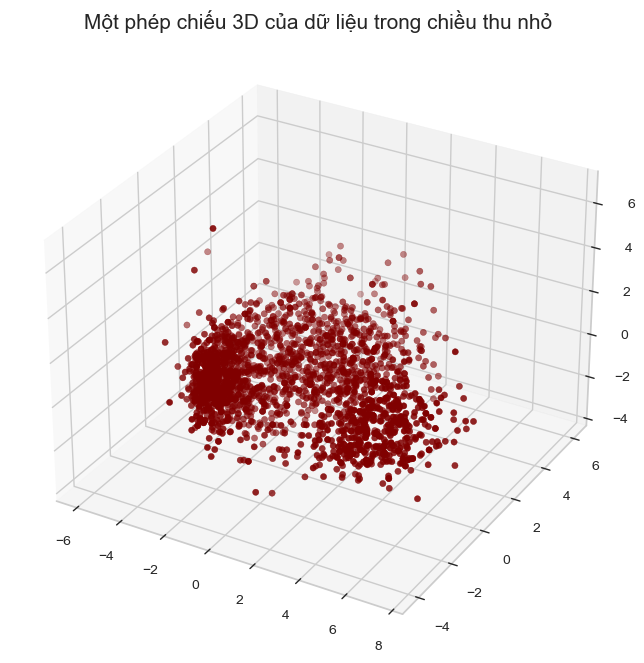

In [36]:
# Một phép chiếu 3D của dữ liệu trong chiều thu nhỏ
x =df_pca["D1"]
y =df_pca["D2"]
z =df_pca["D3"]
# To plot
fig = plt.figure(figsize=(10,8))
a = fig.add_subplot(111, projection="3d")
a.scatter(x,y,z, c="maroon", marker="o" )
a.set_title("Một phép chiếu 3D của dữ liệu trong chiều thu nhỏ", size=15)
plt.show()